# import lib

In [102]:
import pandas
import psycopg2 
import configparser

# Connect to database

In [103]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [104]:
cur=conn.cursor()

# Q1

In [23]:
q1_sql = """ select *
            from gp7.students"""

In [24]:
cur.execute(q1_sql)

In [25]:
df=pandas.read_sql_query(q1_sql,conn)
df[:]

,s_email,s_name,s_major
0,matthew21@gmail.com,Matthew Luciano,IA
1,jkl@gmail.com,jack Ross,IA
2,fgh@gmail.com,Fred Cross,IA
3,dhj@gmail.com\n,Daniel Jones,Engineering\n


#Q2

In [27]:
q2_sql = """select gp7.professor.p_name, gp7.courses.c_name
                from gp7.professor
                inner join gp7.courses
                on gp7.professor.p_email = gp7.courses.p_email"""

In [30]:
df=pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,Kathleen A Moore,Ia908
1,Timothy R Walton,Ia210
2,John A Robinson,Ia340
3,New_prof_name,New_C_room
4,New_prof_name,Ia234


#q3

In [44]:
q3_sql= """select c_number, count (*) as enrolled
        from gp7.enroll_list
        group by c_number
        order by enrolled desc
"""

<AxesSubplot:xlabel='c_number'>

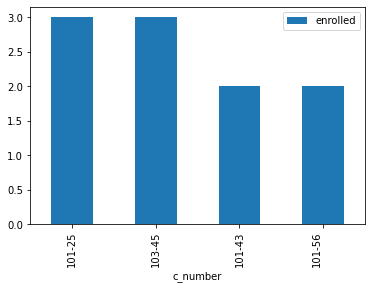

In [45]:
df=pandas.read_sql_query(q3_sql,conn)

df.plot.bar(x='c_number',y='enrolled')

#q4

In [46]:
q4_sql = """select gp7.professor.p_name, count(gp7.courses.c_number) as c_total
            from  gp7.professor
            inner join gp7.courses
            on gp7.professor.p_email = gp7.courses.p_email
            group by p_name,c_number
            order by c_total desc"""

<AxesSubplot:xlabel='p_name'>

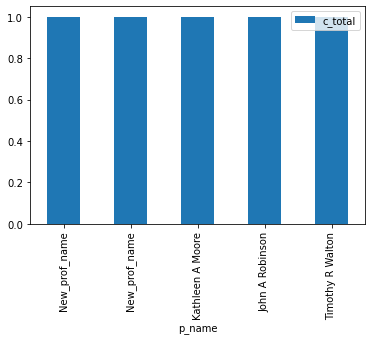

In [48]:
df=pandas.read_sql_query(q4_sql,conn)

df.plot.bar(x='p_name',y='c_total')

# Q5


In [160]:
q5_sql = """insert into gp7.professor(p_email,p_name,p_office)
        values ('{}', '{}','{}')""".format('new_l4_email','new_l4_name','new_l4_office')
print(q5_sql)

insert into gp7.professor(p_email,p_name,p_office)
        values ('new_l4_email', 'new_l4_name','new_l4_office')


In [161]:
cur.execute(q5_sql)

In [162]:
conn.commit()

In [163]:

df=pandas.read_sql_query('select * from gp7.professor',conn)
df[:]

,p_email,p_name,p_office
0,moore8ka@jmu.edu,Kathleen A Moore,ISAT116
1,robinsja@jmu.edu,John A Robinson,ISAT127
2,waltontr@jmu.edu,Timothy R Walton,ISAT326
3,New_Prof_email,New_prof_name,New_prof_office
4,new_l4_email,new_l4_name,new_l4_office


In [164]:
q52_sql = """insert into gp7.courses(c_number,c_room,c_name,p_email)
                values('{}','{}','{}','{}')""".format('101-11','2010','Ia345','new_l4_email')
print(q52_sql)

insert into gp7.courses(c_number,c_room,c_name,p_email)
                values('101-11','2010','Ia345','new_l4_email')


In [165]:
cur.execute(q52_sql)

In [166]:
conn.commit()

In [167]:
df=pandas.read_sql_query('select * from gp7.courses',conn)
df[:]

,c_number,c_name,c_room,p_email
0,101-43,Ia908,Isat367,moore8ka@jmu.edu
1,103-45,Ia210,Engeo2010,waltontr@jmu.edu
2,101-56\n,Ia340,Isat315,robinsja@jmu.edu
3,New_C_num,New_C_room,New_C_name,New_Prof_email
4,101-25,Ia234,Engeo2001,New_Prof_email
5,101-11,Ia345,2010,new_l4_email


In [168]:
q6_sql ="""update gp7.courses
            set p_email = '{}'
            where p_email= '{}'
            """.format('new_l4_email','New_Prof_email')

In [169]:
cur.execute(q6_sql)

In [170]:
conn.commit()

In [171]:
df=pandas.read_sql_query('select * from gp7.courses',conn)
df[:]

,c_number,c_name,c_room,p_email
0,101-43,Ia908,Isat367,moore8ka@jmu.edu
1,103-45,Ia210,Engeo2010,waltontr@jmu.edu
2,101-56\n,Ia340,Isat315,robinsja@jmu.edu
3,101-11,Ia345,2010,new_l4_email
4,New_C_num,New_C_room,New_C_name,new_l4_email
5,101-25,Ia234,Engeo2001,new_l4_email


In [172]:
q6_delete_sql="""delete from gp7.professor
                 where p_email='{}'
                 """.format('New_Prof_email')

In [173]:
cur.execute(q6_delete_sql)

In [174]:
conn.commit()

In [175]:
df=pandas.read_sql_query('select * from gp7.professor',conn)
df[:]

,p_email,p_name,p_office
0,moore8ka@jmu.edu,Kathleen A Moore,ISAT116
1,robinsja@jmu.edu,John A Robinson,ISAT127
2,waltontr@jmu.edu,Timothy R Walton,ISAT326
3,new_l4_email,new_l4_name,new_l4_office


In [ ]:
cur.close()

In [176]:
conn.close()